In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#RUN THIS CODE TO LOAD FIRST DATAFRAME
#(Pickle allows you to save any object (like dataframes) to ur file system)

df = pd.read_pickle("./data/data_pkls/stock50.pkl")

### Exploratory Data Analysis

In [3]:
#Check data frame head and tail

#Comment one line
#df.head()
df.tail()

GOOG                                                  \
                  Open        High         Low       Close   Adj Close   
Date                                                                     
2024-01-08  138.000000  140.639999  137.880005  140.529999  140.529999   
2024-01-09  140.059998  142.800003  139.789993  142.559998  142.559998   
2024-01-10  142.520004  144.524994  142.460007  143.800003  143.800003   
2024-01-11  144.895004  146.660004  142.214996  143.669998  143.669998   
2024-01-12  144.339996  144.739899  143.360001  144.240005  144.240005   

                              ABNB                                      ...  \
                Volume        Open        High         Low       Close  ...   
Date                                                                    ...   
2024-01-08  17645300.0  137.309998  140.250000  136.610001  140.080002  ...   
2024-01-09  19579700.0  138.520004  139.539993  137.789993  139.529999  ...   
2024-01-10  16641900.0  139.199997  140.824997  138.699997  139.759995  ...   
2024-01-11  17471100.0  140.710007  141.199997  137.550003  139.449997  ...   
2024-01-12  13710960.0  139.350006  140.990005  137.130005  137.139999  ...   

                  AMAT                                            MMM  \
                   Low       Close   Adj Close     Volume        Open   
Date                                                                    
2024-01-08  149.720001  151.559998  151.559998  6515500.0  108.260002   
2024-01-09  148.929993  151.029999  151.029999  5606700.0  108.199997   
2024-01-10  148.240005  149.809998  149.809998  5035700.0  109.019997   
2024-01-11  148.479996  151.949997  151.949997  5995600.0  108.300003   
2024-01-12  150.369995  151.250000  151.250000  4075853.0  109.419998   

                                                                     
                  High         Low       Close   Adj Close   Volume  
Date                                                                 
2024-01-08  108.959999  107.589996  108.860001  108.860001  2119600  
2024-01-09  109.300003  107.349998  109.099998  109.099998  2458000  
2024-01-10  109.120003  107.839996  108.300003  108.300003  1999800  
2024-01-11  109.000000  107.209999  108.919998  108.919998  2685800  
2024-01-12  110.160004  107.889999  108.120003  108.120003  2913595  

[5 rows x 300 columns]

In [4]:
#Check size of the information
df.shape

(15615, 300)

In [31]:
#Comment different lines to see different things about the df

#datframe info
df.info

#dataframe index
df.index

#dataframe columns
#check companies
df.columns.get_level_values(0).unique()

#check features about companies
#df.columns.get_level_values(1).unique()

Index(['GOOG', 'ABNB', 'ANET', 'AEE', 'GOOGL', 'AMT', 'AMP', 'ALLE', 'AAL',
       'ABBV', 'AMGN', 'AAPL', 'APH', 'A', 'ADBE', 'ALB', 'ADSK', 'APA', 'ALL',
       'AMZN', 'APTV', 'AWK', 'AFL', 'ADI', 'ADM', 'AEP', 'ATO', 'ACN', 'MO',
       'AIG', 'AKAM', 'ANSS', 'LNT', 'AOS', 'ALGN', 'AMCR', 'AMD', 'AME',
       'APD', 'AJG', 'ARE', 'AON', 'AIZ', 'ABT', 'AXP', 'ACGL', 'T', 'AES',
       'AMAT', 'MMM'],
      dtype='object')

<Axes: xlabel='None-None', ylabel='Date'>

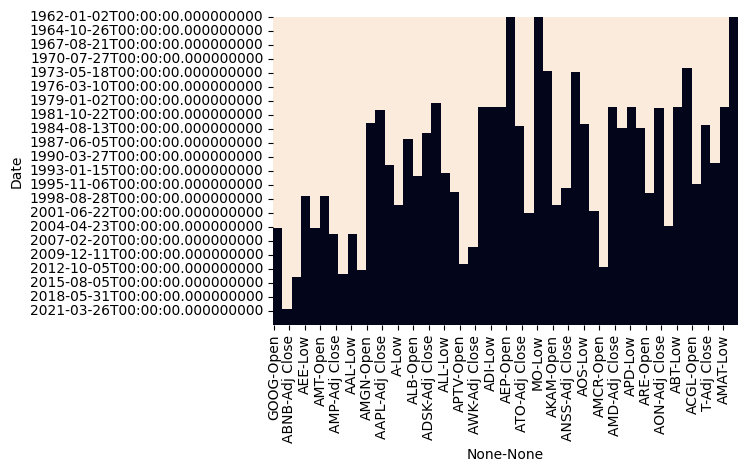

In [6]:
#Check for Missing values

plt.figure(figsize=(6,4))
sns.heatmap(df.isnull(),cbar=False)

#We can see that basically there is only complete data from 2021 to 2022 but if we can fix/infer close feature for airbnb we can have data from 2015
#Although I think 2 years of data is enough for first versions of the project - Juan HenaoBarrios

In [11]:
#pre view data
sneak_peak_index = df.index[-762:] #take a slice of data
sneak_peak = df.loc[ sneak_peak_index, :]#take data from 2021 to the present
sneak_peak = sneak_peak.loc[:,['GOOG']] #Select a specific company otherwise pairplot will take too much time

sneak_peak.head()

GOOG                                                        
                 Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2021-01-04  87.876999  88.032501  85.392502  86.412003  86.412003  38038000.0
2021-01-05  86.250000  87.383499  85.900749  87.045998  87.045998  22906000.0
2021-01-06  85.131500  87.400002  84.949997  86.764503  86.764503  52042000.0
2021-01-07  87.002998  89.419998  86.852501  89.362503  89.362503  45300000.0
2021-01-08  89.399002  90.491997  88.676750  90.360497  90.360497  41012000.0

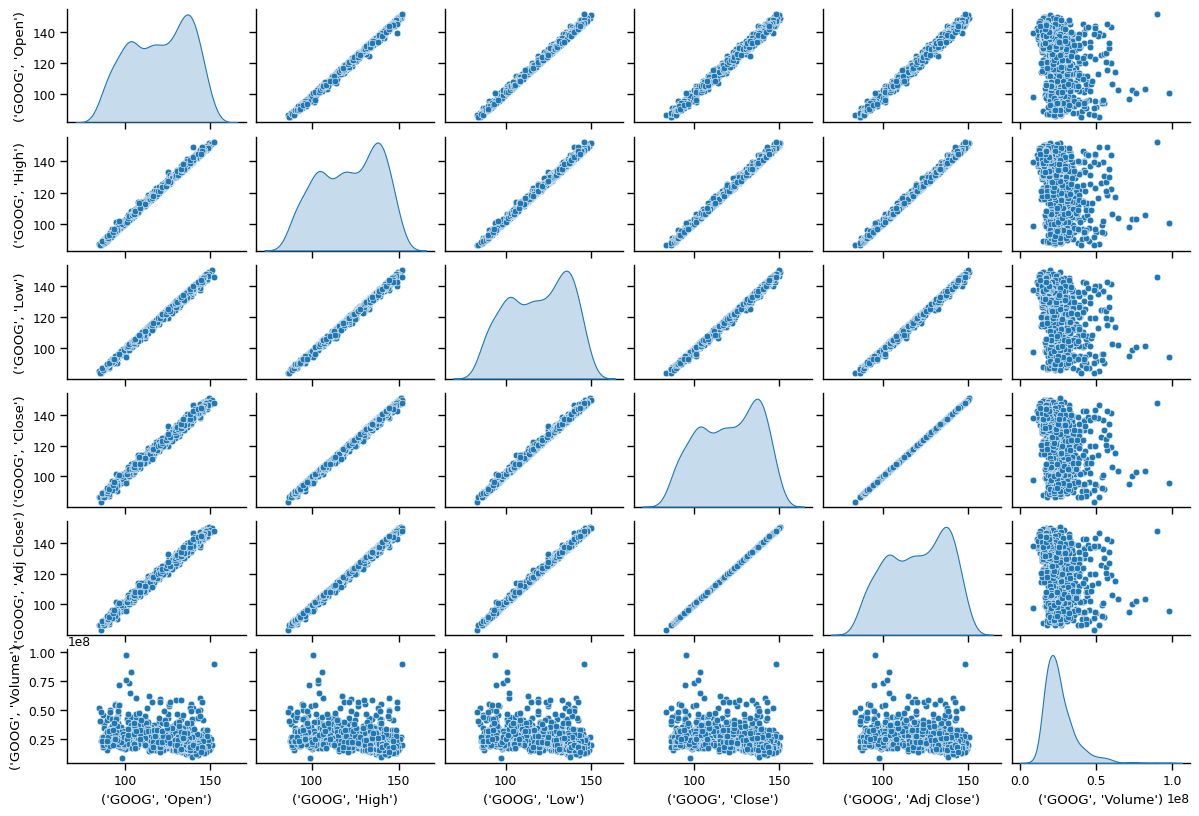

In [33]:
sns.set_context("paper")
g=sns.pairplot(data=sneak_peak, diag_kind='kde')
g.fig.set_size_inches(12,8)

In [25]:
#Load company info (50)

import json
with open("./data/company_info/company_data50.json") as j:
    contents = json.loads(j.read())

contents

{'MMM': {'address1': '1200 Main Street',
  'city': 'Kansas City',
  'state': 'MO',
  'zip': '64105',
  'country': 'United States',
  'phone': '816 556 2200',
  'website': 'https://investors.evergy.com',
  'industry': 'Utilities - Regulated Electric',
  'industryKey': 'utilities-regulated-electric',
  'industryDisp': 'Utilities - Regulated Electric',
  'sector': 'Utilities',
  'sectorKey': 'utilities',
  'sectorDisp': 'Utilities',
  'longBusinessSummary': 'Evergy, Inc., together with its subsidiaries, engages in the generation, transmission, distribution, and sale of electricity in Kansas and Missouri, the United States. The company generates electricity through coal, hydroelectric, landfill gas, uranium, and natural gas and oil sources, as well as solar, wind, other renewable sources. It serves residences, commercial firms, industrials, municipalities, and other electric utilities. The company was incorporated in 2017 and is headquartered in Kansas City, Missouri.',
  'fullTimeEmployee